#Descripción de la Tarea:
Tu tarea es crear un conjunto de gráficos que analicen las series de tiempo de 'realcons' (Gasto de Consumo Real) y 'realgovt' (Gasto Gubernamental Real) de la base de datos macroeconómica de Estados Unidos. Descompondrás ambas series en ciclo y tendencia utilizando el filtro de Hodrick-Prescott. Utilizarás Statsmodels y Seaborn para este propósito, y deberás pedir la asistencia de ChatGPT para generar el código necesario.

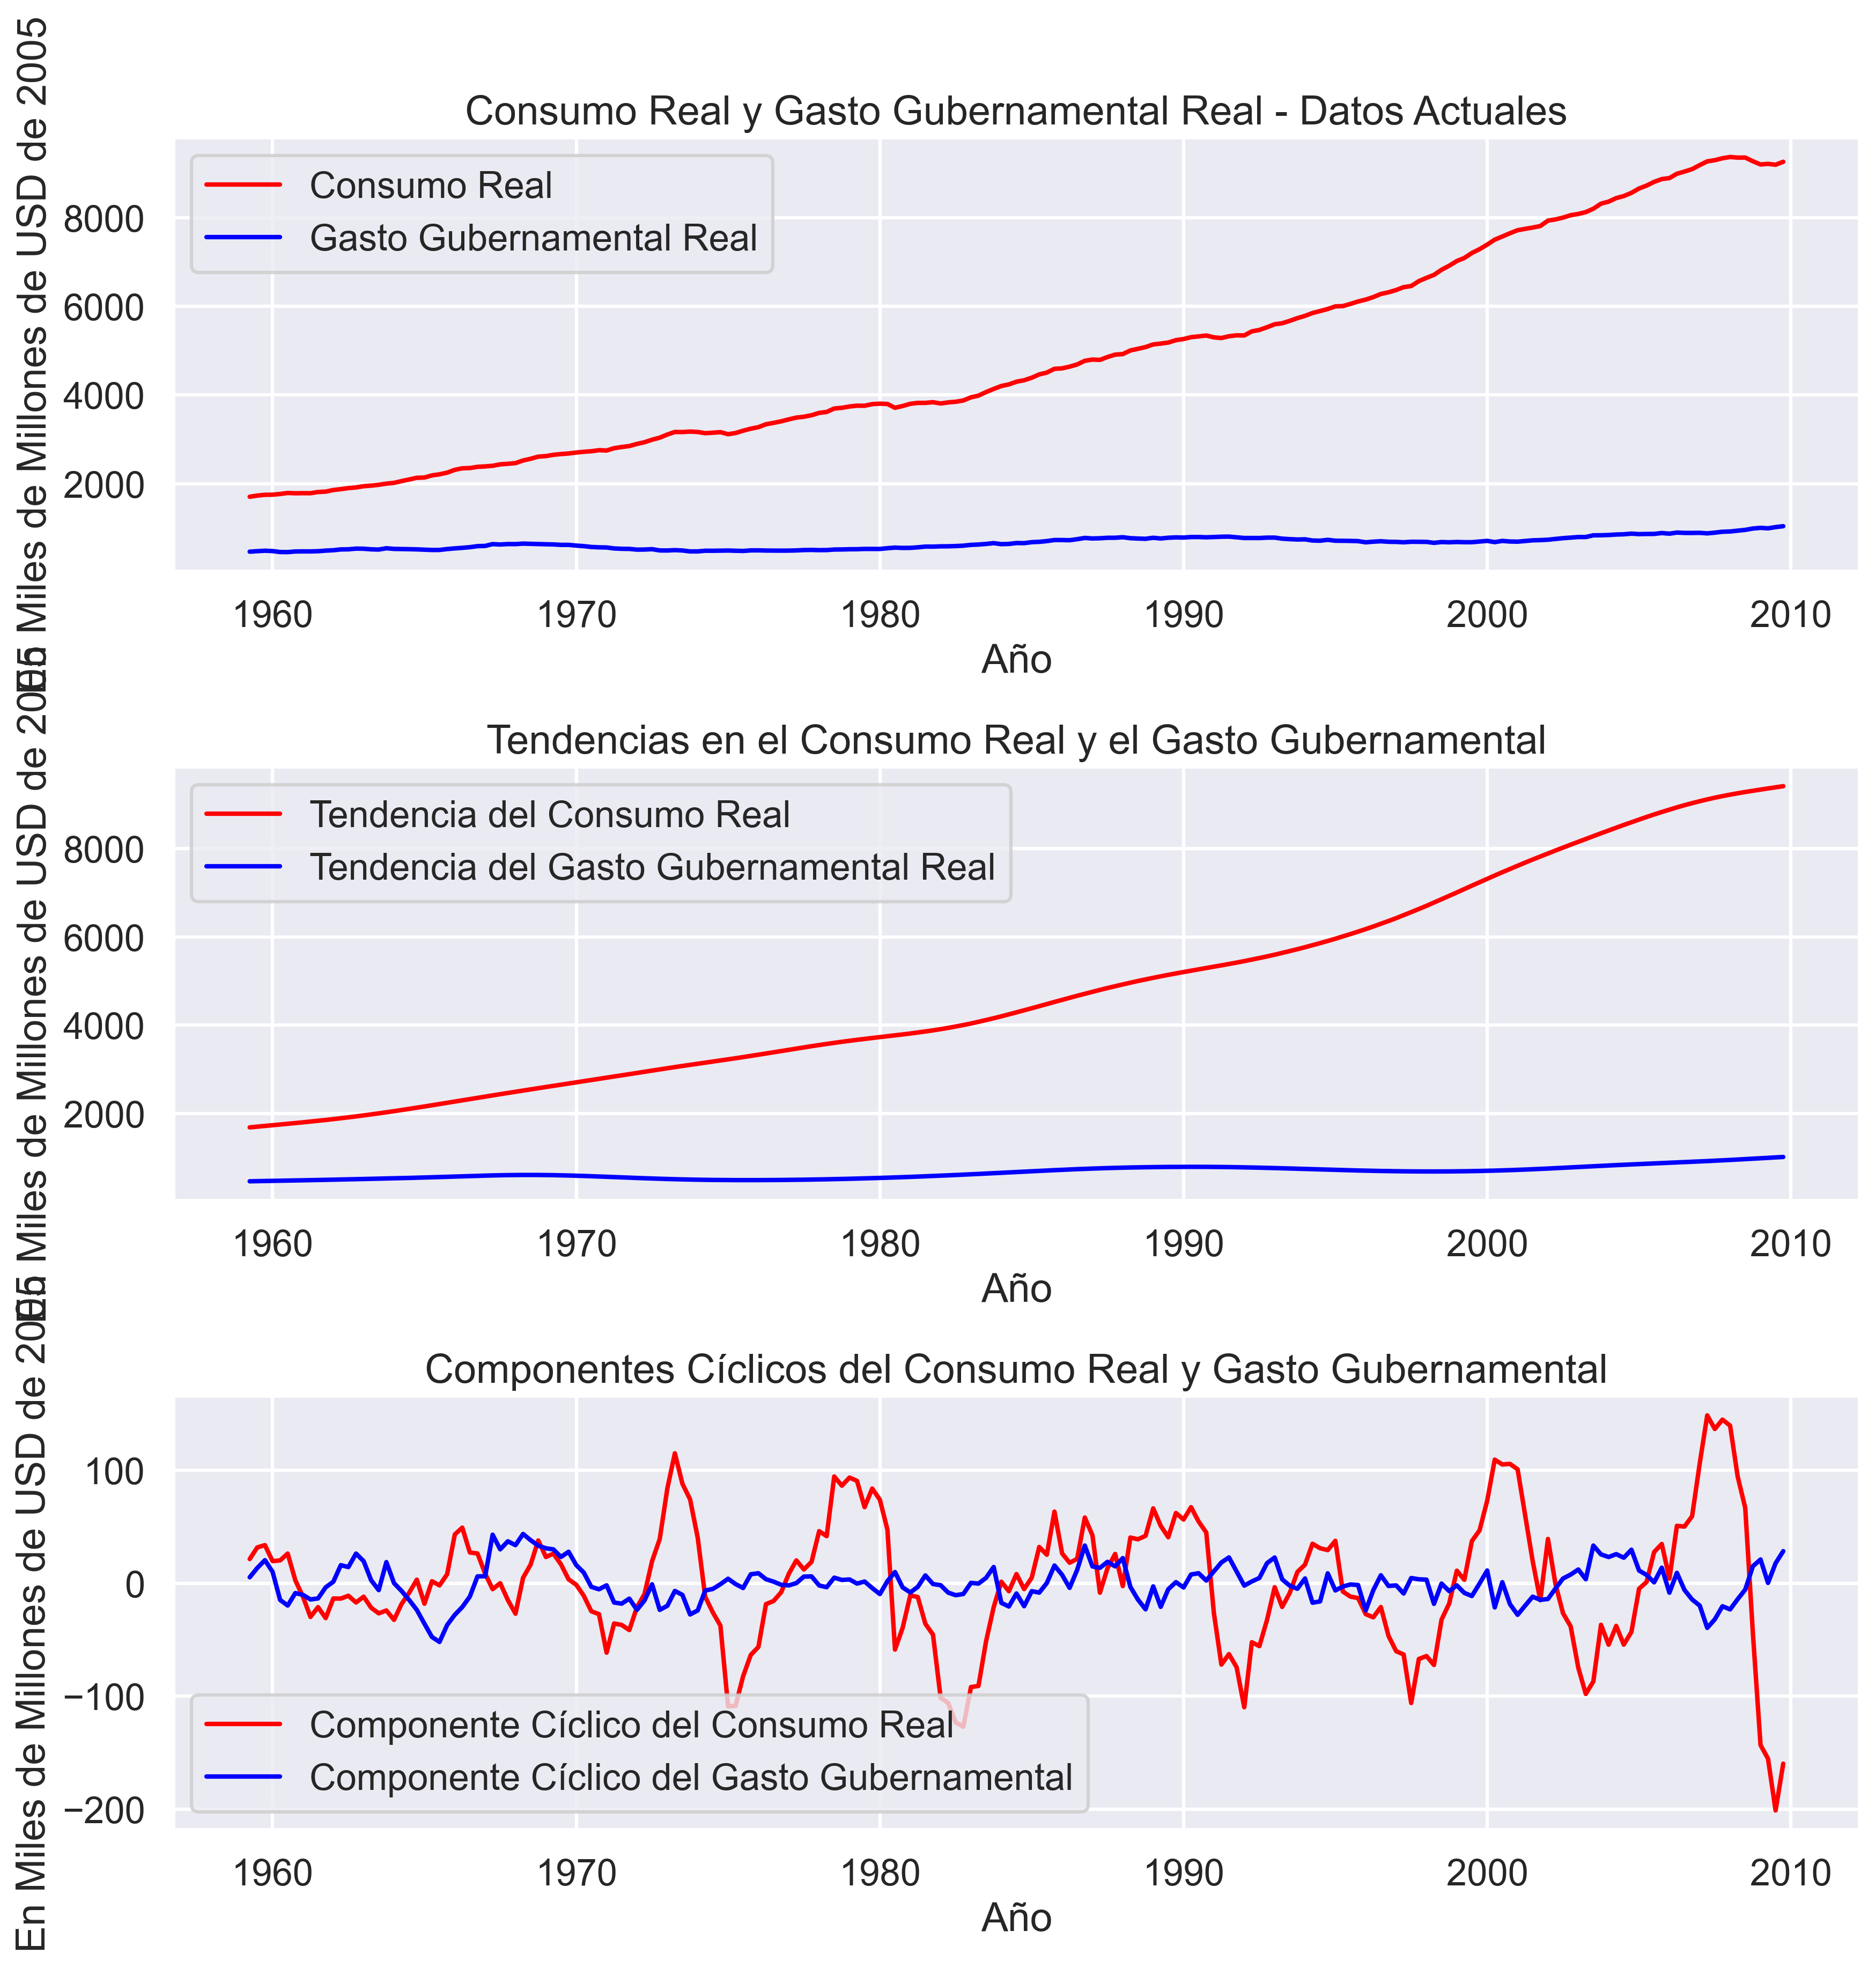

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

# Cargar la base de datos macroeconómica
df = sm.datasets.macrodata.load_pandas().data

# Revisar el rango de fechas en la base de datos
df_range = len(df)

# Ajustar el índice de fechas para coincidir con el rango de la base de datos
adjusted_dates = pd.date_range(start='1959Q1', periods=df_range, freq='Q')
df.index = adjusted_dates

# Reaplicar el filtro de Hodrick-Prescott
realcons_cycle, realcons_trend = hpfilter(df['realcons'], lamb=1600)
realgovt_cycle, realgovt_trend = hpfilter(df['realgovt'], lamb=1600)


# Configurar Seaborn con tema 'darkgrid'
sns.set(style="darkgrid", context="talk")

# Crear gráficos
plt.figure(figsize=(12, 12), dpi=300)

# Gráfico 1: Datos reales de 'realcons' y 'realgovt'
plt.subplot(3, 1, 1)
plt.plot(df['realcons'], label='Consumo Real', color='red', linewidth=2)
plt.plot(df['realgovt'], label='Gasto Gubernamental Real', color='blue', linewidth=2)
plt.title("Consumo Real y Gasto Gubernamental Real - Datos Actuales")
plt.xlabel("Año")
plt.ylabel("En Miles de Millones de USD de 2005")
plt.legend()

# Gráfico 2: Tendencias de 'realcons' y 'realgovt'
plt.subplot(3, 1, 2)
plt.plot(realcons_trend, label='Tendencia del Consumo Real', color='red', linewidth=2)
plt.plot(realgovt_trend, label='Tendencia del Gasto Gubernamental Real', color='blue', linewidth=2)
plt.title("Tendencias en el Consumo Real y el Gasto Gubernamental")
plt.xlabel("Año")
plt.ylabel("En Miles de Millones de USD de 2005")
plt.legend()

# Gráfico 3: Componentes cíclicos de 'realcons' y 'realgovt'
plt.subplot(3, 1, 3)
plt.plot(realcons_cycle, label='Componente Cíclico del Consumo Real', color='red', linewidth=2)
plt.plot(realgovt_cycle, label='Componente Cíclico del Gasto Gubernamental', color='blue', linewidth=2)
plt.title("Componentes Cíclicos del Consumo Real y Gasto Gubernamental")
plt.xlabel("Año")
plt.ylabel("En Miles de Millones de USD de 2005")
plt.legend()

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()
